### Data Science Capstone
##### Course-end Project 2- Healthcare
#### By - Arka Prava Panda

Importing Libraries

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  

Loading Dataset

In [36]:
data = pd.read_csv('health_care_diabetes_raw.csv')

In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
data.shape

(768, 9)

 Project Task: Week 1 -- Data Exploration and Missing Values Treatment

In [22]:
#Checking for null values in Dataset
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

 Since the 0 value in Glucose,BloodPressure,SkinThickness,Insulin and BMI variables represent missing values.Lets find now many instances are there in each of the above variables

In [23]:
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [168]:
(5/765)*100
#only 0.6% of data is having missing values in Glucose column. No need to worry we can ignore them

0.6535947712418301

In [24]:
(data[data['BloodPressure']==0]).shape

(35, 9)

In [170]:
(35/765)*100
#4.5% of data is having missing values in BloodPressure column

4.57516339869281

In [25]:
(data[data['SkinThickness']==0]).shape

(227, 9)

In [30]:
(227/765)*100
#29.6% of data is having missing values in SkinThickness column

29.673202614379086

In [26]:
(data[data['Insulin']==0]).shape

(374, 9)

In [33]:
(374/765)*100
#~49% of data is having missing values in Insulin column

48.888888888888886

In [27]:
(data[data['BMI']==0]).shape

(11, 9)

In [36]:
(11/765)*100
#1.4% of data is having missing values in BMI column

1.4379084967320261

 Since Insulin and SkinThickness are having higher percentages of missing values lets try to fill up the missing values

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

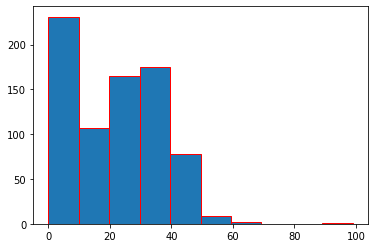

In [28]:
plt.hist(data['SkinThickness'],edgecolor='red')

In [175]:
data[data['SkinThickness']!=0]['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 10 Patch objects>)

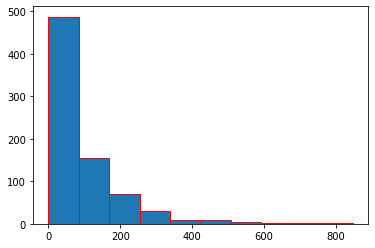

In [29]:
plt.hist(data['Insulin'],edgecolor='red')

In [30]:
data[data['Insulin']!=0]['Insulin'].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

 Mean value of Skinthickness is ~29 and the mean value of Insulin is ~155 let impute the missing values with means

In [31]:
from numpy import nan
dataset_imputed = data
dataset_imputed[['SkinThickness','Insulin']] = dataset_imputed[['SkinThickness','Insulin']].replace(0, nan)

In [32]:
dataset_imputed.fillna(dataset_imputed.mean(), inplace=True)

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <a list of 10 Patch objects>)

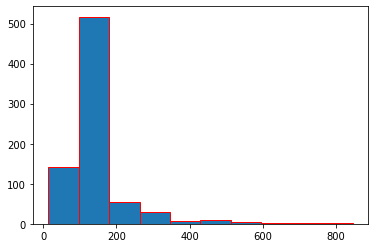

In [33]:
plt.hist(dataset_imputed['Insulin'],edgecolor='red')

In [37]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
dataset_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [181]:
dataset_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [39]:
Positive = dataset_imputed[dataset_imputed['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
6,3,78,50,32.00000,88.000000,31.0,0.248,26,1
8,2,197,70,45.00000,543.000000,30.5,0.158,53,1


In [40]:
Negative = dataset_imputed[dataset_imputed['Outcome']==0]
Negative.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
5,5,116,74,29.15342,155.548223,25.6,0.201,30,0
7,10,115,0,29.15342,155.548223,35.3,0.134,29,0
10,4,110,92,29.15342,155.548223,37.6,0.191,30,0


In [41]:
dataset_imputed['Glucose'].value_counts().head(5)

100    17
99     17
129    14
125    14
111    14
Name: Glucose, dtype: int64

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

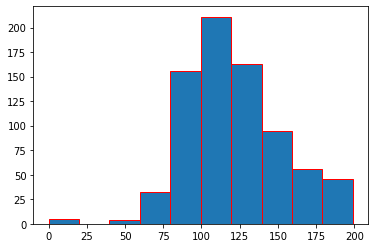

In [42]:
plt.hist(dataset_imputed['Glucose'],edgecolor='red')


In [43]:
dataset_imputed['BloodPressure'].value_counts().head(7)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
Name: BloodPressure, dtype: int64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 10 Patch objects>)

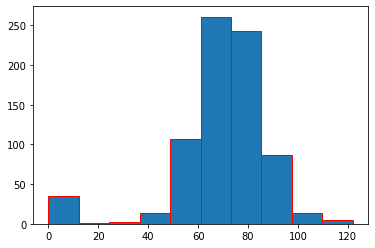

In [44]:
plt.hist(dataset_imputed['BloodPressure'],edgecolor='red')

In [45]:
dataset_imputed['SkinThickness'].value_counts().head(7)

29.15342    227
32.00000     31
30.00000     27
27.00000     23
23.00000     22
33.00000     20
18.00000     20
Name: SkinThickness, dtype: int64

(array([ 59., 141., 408., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <a list of 10 Patch objects>)

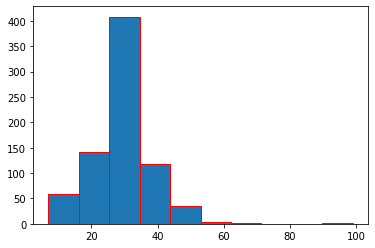

In [46]:
plt.hist(dataset_imputed['SkinThickness'],edgecolor='red')

In [47]:
dataset_imputed['Insulin'].value_counts().head(7)

155.548223    374
105.000000     11
140.000000      9
130.000000      9
120.000000      8
180.000000      7
94.000000       7
Name: Insulin, dtype: int64

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <a list of 10 Patch objects>)

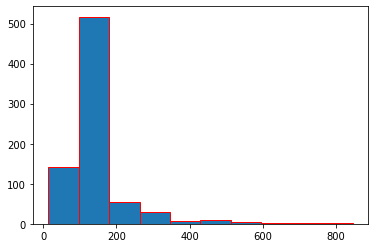

In [48]:
plt.hist(dataset_imputed['Insulin'],edgecolor='red')

In [49]:
dataset_imputed['BMI'].value_counts().head(7)

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
Name: BMI, dtype: int64

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 10 Patch objects>)

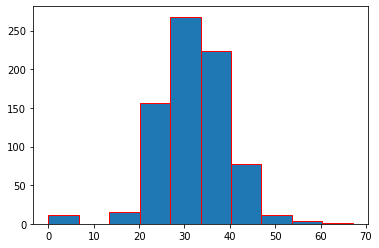

In [50]:
plt.hist(dataset_imputed['BMI'],edgecolor='red')

In [51]:
dataset_imputed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.000000,140.250000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.000000,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.000000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


 Project Task: Week 2 -- Correlation Analysis and Scatter Plots

In [52]:
Positive.shape

(268, 9)

In [53]:
Negative.shape

(500, 9)

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 38., 61., 61., 36., 27.,
        14.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([ 0.   ,  3.355,  6.71 , 10.065, 13.42 , 16.775, 20.13 , 23.485,
        26.84 , 30.195, 33.55 , 36.905, 40.26 , 43.615, 46.97 , 50.325,
        53.68 , 57.035, 60.39 , 63.745, 67.1  ]),
 <a list of 1 Patch objects>)

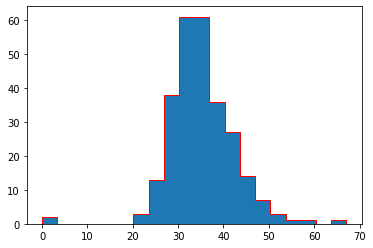

In [54]:
plt.hist(Positive['BMI'],histtype='stepfilled',bins=20,edgecolor='red')

In [55]:
Positive['BMI'].value_counts().head(7)

32.9    8
31.6    7
33.3    6
30.5    5
32.0    5
31.2    5
32.4    4
Name: BMI, dtype: int64

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 28., 26., 36.,
        27., 29., 22., 24., 21., 25., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <a list of 1 Patch objects>)

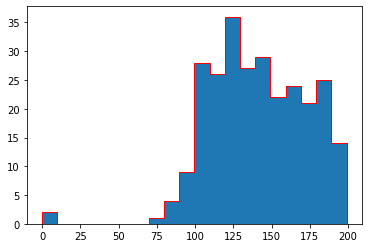

In [56]:
plt.hist(Positive['Glucose'],histtype='stepfilled',bins=20,edgecolor='red')

In [57]:
Positive['Glucose'].value_counts().head(7)

125    7
158    6
128    6
115    6
129    6
146    5
162    5
Name: Glucose, dtype: int64

(array([16.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  6., 19., 37., 56.,
        36., 41., 31.,  7.,  4.,  4.,  3.]),
 array([  0. ,   5.7,  11.4,  17.1,  22.8,  28.5,  34.2,  39.9,  45.6,
         51.3,  57. ,  62.7,  68.4,  74.1,  79.8,  85.5,  91.2,  96.9,
        102.6, 108.3, 114. ]),
 <a list of 1 Patch objects>)

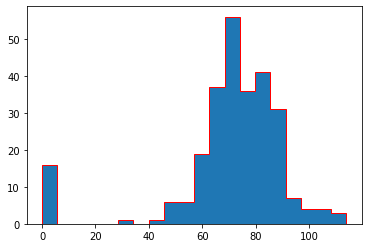

In [58]:
plt.hist(Positive['BloodPressure'],histtype='stepfilled',bins=20,edgecolor='red')

In [59]:
Positive['BloodPressure'].value_counts().head(7)

70    23
76    18
78    17
74    17
72    16
0     16
82    13
Name: BloodPressure, dtype: int64

(array([  1.,   5.,  11.,  21., 113.,  41.,  34.,  20.,  15.,   4.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 7. , 11.6, 16.2, 20.8, 25.4, 30. , 34.6, 39.2, 43.8, 48.4, 53. ,
        57.6, 62.2, 66.8, 71.4, 76. , 80.6, 85.2, 89.8, 94.4, 99. ]),
 <a list of 1 Patch objects>)

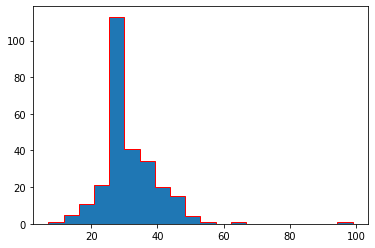

In [60]:
plt.hist(Positive['SkinThickness'],histtype='stepfilled',bins=20,edgecolor='red')

In [61]:
Positive['SkinThickness'].value_counts().head(7)

29.15342    88
32.00000    14
30.00000     9
33.00000     9
39.00000     8
36.00000     8
37.00000     8
Name: SkinThickness, dtype: int64

(array([  4.,  12.,  27., 169.,  18.,  10.,   8.,   5.,   2.,   1.,   1.,
          6.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  55.6,  97.2, 138.8, 180.4, 222. , 263.6, 305.2, 346.8,
        388.4, 430. , 471.6, 513.2, 554.8, 596.4, 638. , 679.6, 721.2,
        762.8, 804.4, 846. ]),
 <a list of 1 Patch objects>)

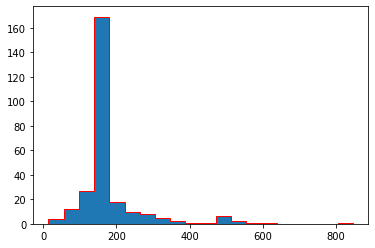

In [62]:
plt.hist(Positive['Insulin'],histtype='stepfilled',bins=20,edgecolor='red')

In [63]:
Positive['Insulin'].value_counts().head(7)

155.548223    138
130.000000      6
180.000000      4
156.000000      3
175.000000      3
144.000000      2
194.000000      2
Name: Insulin, dtype: int64

### Scatter plots

In [ ]:
#Pair plots for all dataset
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset_imputed,hue="Outcome")

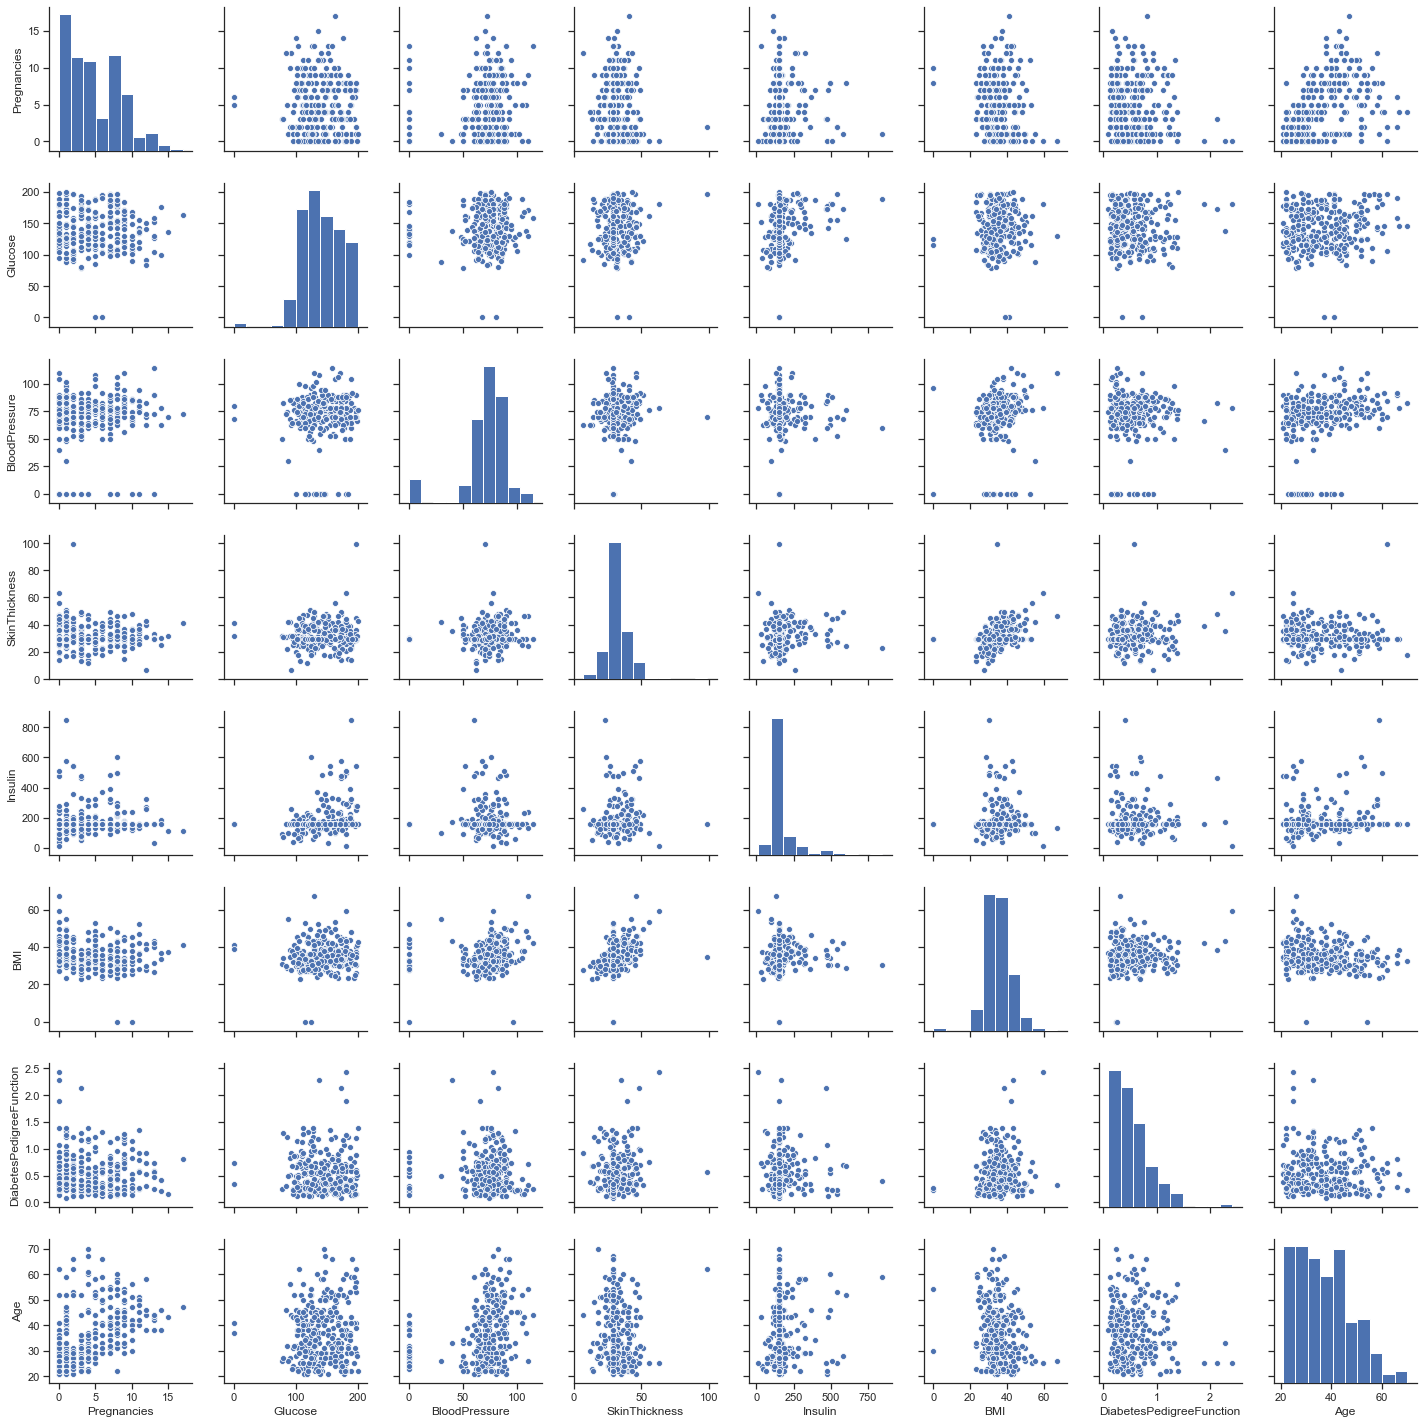

In [65]:
#Pair plots for all Positive cases
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Positive[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])

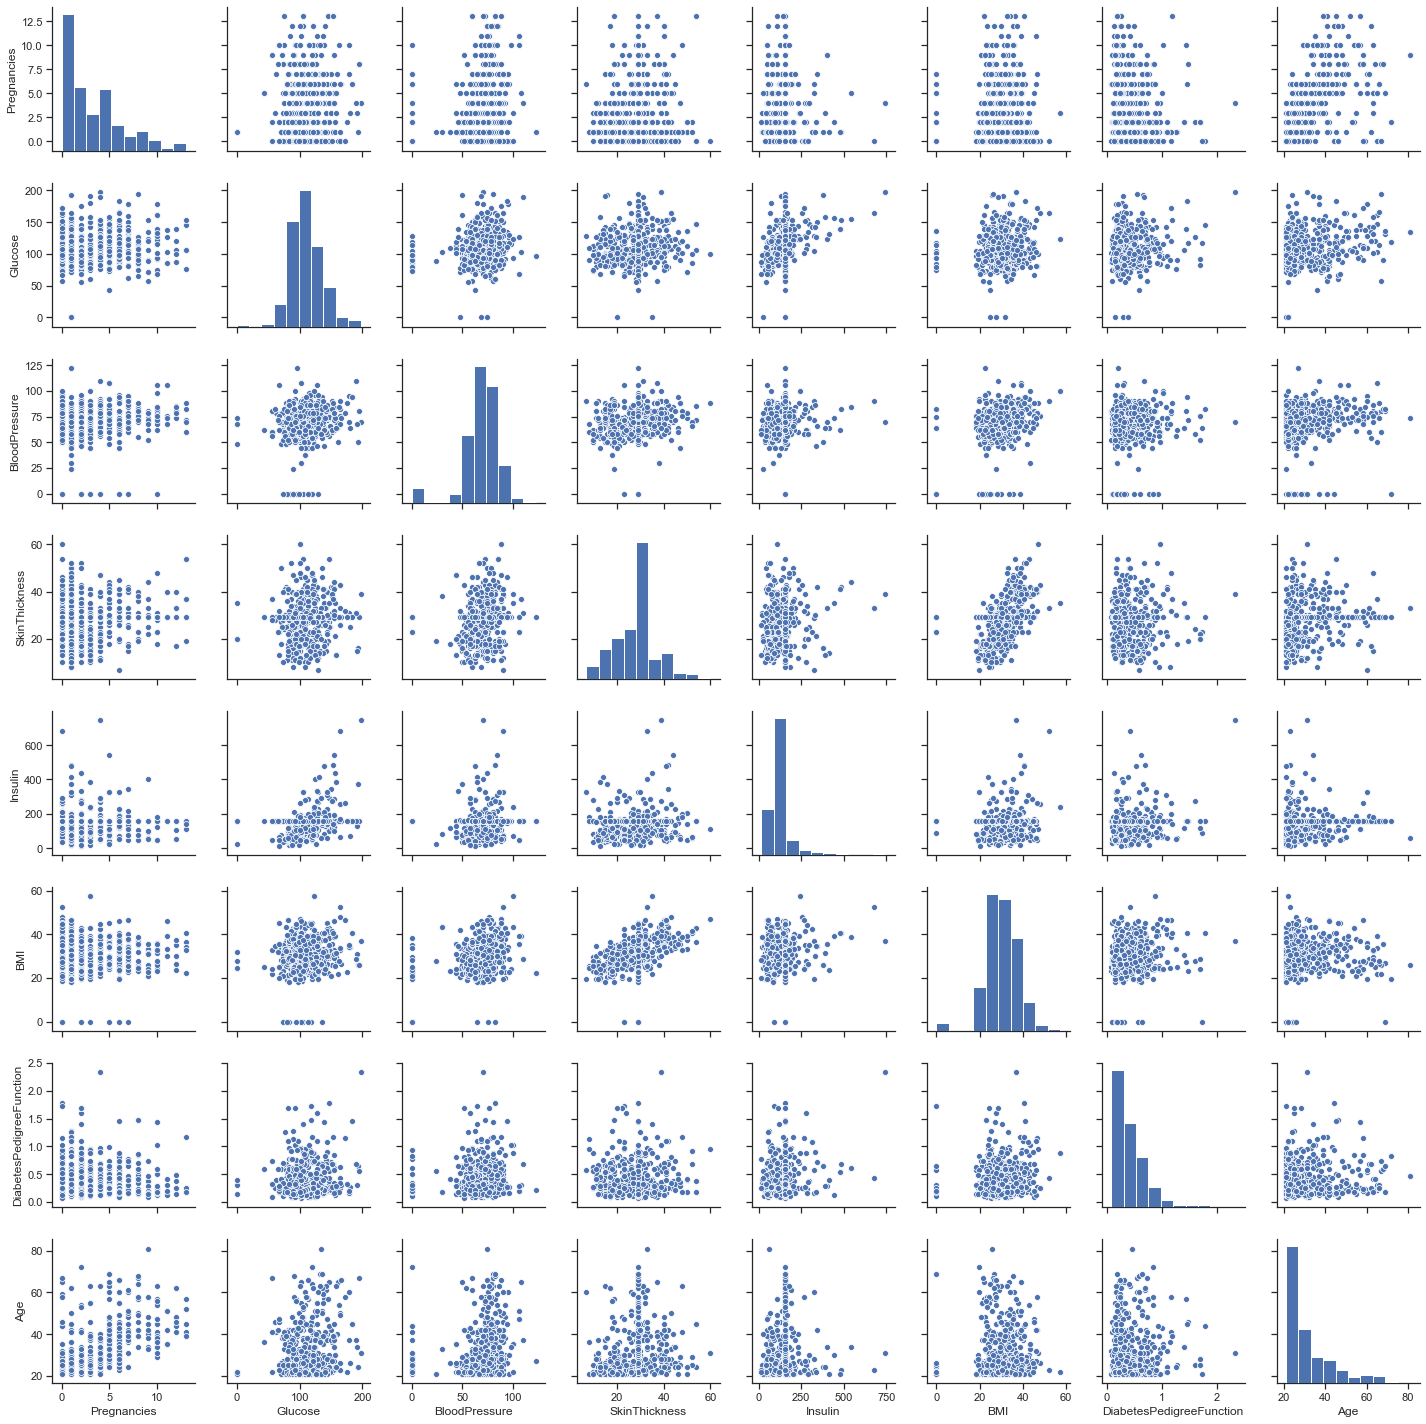

In [66]:
#Pair plots for all Negative cases
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Negative[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])

 Correlation Analysis and Heat map

In [67]:
### correlation matrix
dataset_imputed.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.082989,0.056027,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.182455,0.407699,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.123444,0.045319,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.082989,0.182455,0.123444,1.000000,0.158139,0.480496,0.100966,0.127872,0.215299
Insulin,0.056027,0.407699,0.045319,0.158139,1.000000,0.149468,0.098634,0.136734,0.214411
BMI,0.017683,0.221071,0.281805,0.480496,0.149468,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.100966,0.098634,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.127872,0.136734,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.215299,0.214411,0.292695,0.173844,0.238356,1.000000


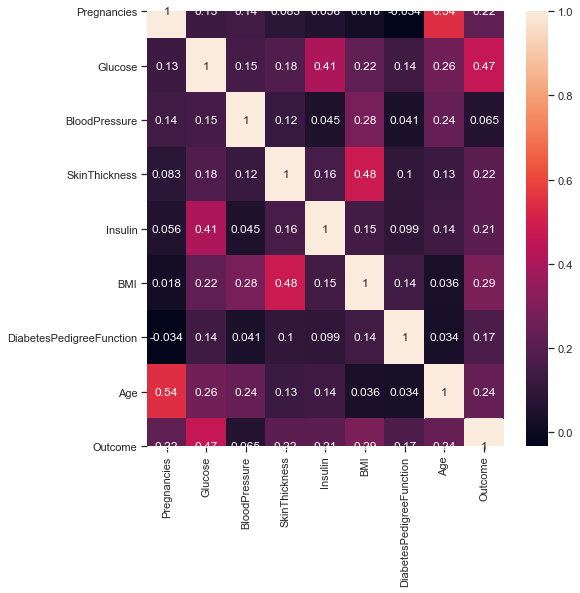

In [68]:
plt.subplots(figsize=(8,8))
sns.heatmap(dataset_imputed.corr(),annot=True) 

##### Correlation Results :
1 There are not much multicolinearity<br/>
2 Pregnancies and Age have some positive corelation<br/>
3 Glucose has some postive corelation with the outcome variable<br/>
4 Skin thickness and BMI has some positive corelation<br/>
5 Insulin and Glucose has some positive corelation


 Project Task: Week 3 and Week 4 -- Data Modelling and Model Performance Evaluation

 Model 1 : Logistic Regression

In [69]:
dataset_imputed.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [70]:
features = dataset_imputed.iloc[:,[0,1,2,3,4,5,6,7]].values
label = dataset_imputed.iloc[:,8].values

In [71]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state =10)

In [ ]:
#Create model
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()
logRegModel.fit(X_train,y_train) 

In [73]:
print(logRegModel.score(X_train,y_train))
print(logRegModel.score(X_test,y_test))

0.7817589576547231
0.7402597402597403


In [74]:
y_pred = logRegModel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logRegModel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[87  8]
 [32 27]]


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        95
           1       0.77      0.46      0.57        59

    accuracy                           0.74       154
   macro avg       0.75      0.69      0.69       154
weighted avg       0.75      0.74      0.72       154



AUC: 0.687


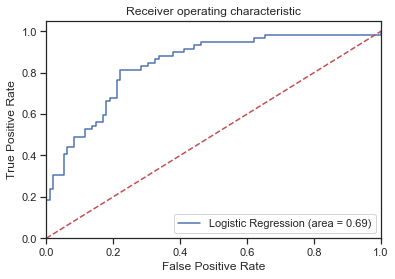

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logRegModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('AUC: %.3f' % logit_roc_auc)
plt.show()

#### Model 2 : Decision Tree Classifier

In [78]:
#Hyper Parameter tuning of max_dept
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
for i in range(3,20):
    print("For max_depth = ",i)
    DTModel = DecisionTreeClassifier(max_depth=i)
    DTModel.fit(X_train,y_train)
    y_pred = DTModel.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

For max_depth =  3
Accuracy: 0.6883116883116883
For max_depth =  4
Accuracy: 0.7402597402597403
For max_depth =  5
Accuracy: 0.7597402597402597
For max_depth =  6
Accuracy: 0.7597402597402597
For max_depth =  7
Accuracy: 0.7597402597402597
For max_depth =  8
Accuracy: 0.7467532467532467
For max_depth =  9
Accuracy: 0.7597402597402597
For max_depth =  10
Accuracy: 0.7727272727272727
For max_depth =  11
Accuracy: 0.7142857142857143
For max_depth =  12
Accuracy: 0.6818181818181818
For max_depth =  13
Accuracy: 0.7272727272727273
For max_depth =  14
Accuracy: 0.7337662337662337
For max_depth =  15
Accuracy: 0.7012987012987013
For max_depth =  16
Accuracy: 0.7142857142857143
For max_depth =  17
Accuracy: 0.6948051948051948
For max_depth =  18
Accuracy: 0.7142857142857143
For max_depth =  19
Accuracy: 0.6883116883116883


Highest Accuracy of Decision Tree Model can be obtained on Max_Depth = 10

In [79]:
DTModel = DecisionTreeClassifier(max_depth=10)
DTModel.fit(X_train,y_train)
y_pred = DTModel.predict(X_test)

In [80]:
DTModel.score(X_train,y_train)

0.9267100977198697

In [81]:
DTModel.score(X_test,y_test)

0.7532467532467533

In [82]:
print('Accuracy of Decision Tree regression classifier on test set: {:.2f}'.format(DTModel.score(X_test, y_test)))

Accuracy of Decision Tree regression classifier on test set: 0.75


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[77 18]
 [20 39]]


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        95
           1       0.72      0.53      0.61        59

    accuracy                           0.74       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.74      0.73       154



In [133]:
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.7209302325581395


In [134]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_test,y_pred)))

Recall score: 0.5254237288135594


AUC: 0.736


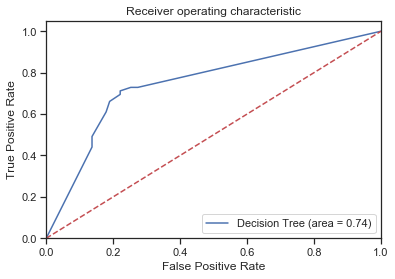

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, DTModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DTModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
print('AUC: %.3f' % dt_roc_auc)
plt.show()

 Model 3 : Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [136]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7302408563782337

In [137]:
#Hyper Parameter tuning of n_estimators

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)


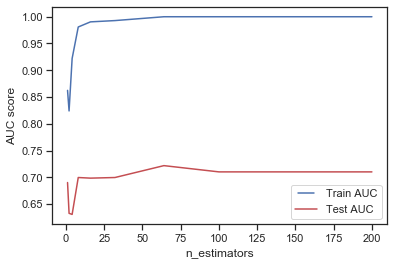

In [138]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [139]:
rfModel = RandomForestClassifier(n_estimators=60)
rfModel.fit(X_train, y_train)
y_pred = rfModel.predict(X_test)

In [140]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7238180196253345

In [141]:
rfModel.score(X_train,y_train)

1.0

In [142]:
rfModel.score(X_test,y_test)

0.7662337662337663

In [143]:
print('Accuracy of Random Forest regression classifier on test set: {:.2f}'.format(rfModel.score(X_test, y_test)))

Accuracy of Random Forest regression classifier on test set: 0.77


In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[86  9]
 [27 32]]


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        95
           1       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [146]:
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.7804878048780488


In [147]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_test,y_pred)))

Recall score: 0.5423728813559322


AUC: 0.724


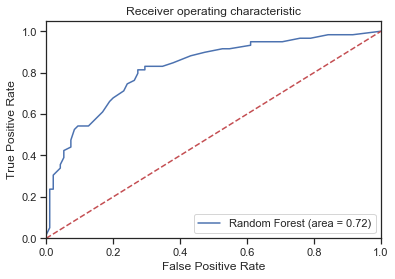

In [148]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rfModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
print('AUC: %.3f' % rf_roc_auc)
plt.show()

 Model 4 : Support Vector Machine

In [119]:
#Support Vector Classifier

from sklearn.svm import SVC 
SVMmodel = SVC(kernel='rbf',
           gamma='auto')
SVMmodel.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [120]:
SVMmodel.score(X_train,y_train)

1.0

In [121]:
SVMmodel.score(X_test,y_test)

0.6168831168831169

 Model 5 : KNN Classifier

In [122]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
knnClassifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [123]:
knnClassifier.score(X_train,y_train)

0.8045602605863192

In [124]:
knnClassifier.score(X_test,y_test)

0.7272727272727273

AUC: 0.739
True Positive Rate - [0.         0.10169492 0.20338983 0.40677966 0.54237288 0.61016949
 0.77966102 0.93220339 1.        ], False Positive Rate - [0.         0.01052632 0.03157895 0.10526316 0.15789474 0.27368421
 0.50526316 0.66315789 1.        ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

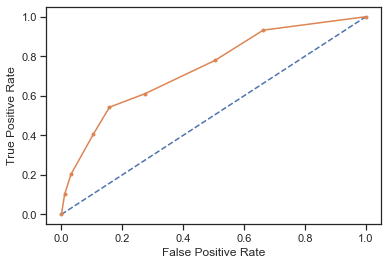

In [125]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities

probs = knnClassifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


In [126]:
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knnClassifier.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.73


f1=0.574 auc=0.769 ap=0.772


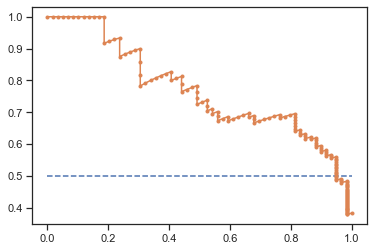

In [127]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = logRegModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = logRegModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.604 auc=0.661 ap=0.624


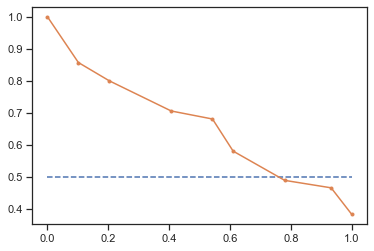

In [128]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = knnClassifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = knnClassifier.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.672 auc=0.699 ap=0.593


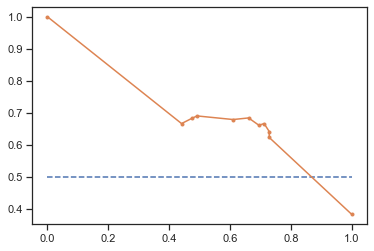

In [129]:
#Precision Recall Curve for Decission Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = DTModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = DTModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.608 auc=0.745 ap=0.741


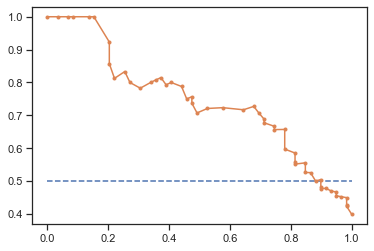

In [130]:
#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = rfModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = rfModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

### We observed that Random Forest is best performing model for this dataset 
### Accuracy of 77%
### Precision = 0.78
### Recall = 0.54
### AUC = 0.72


### Data Reporting

##### 1) First we have created a pie chart to designate between diabetic and non diabetic patients

![Alt text](capstone/1.png)

###### We can observe that 65.10% of the patients are non-diabetic whereas 34.90% of the patients are diabetic

##### 2) Next we have created scatter charts between relevant variables to analyze the relationships

![Alt text](capstone/Screenshot%20from%202023-01-09%2015-10-37.png)

##### 3) Plotted histogram or frequency charts to analyze the distribution of the data

![Alt text](capstone/Screenshot%20from%202023-01-09%2015-10-43.png)![Alt text](capstone/Screenshot%20from%202023-01-09%2015-10-47.png)![Alt text](capstone/Screenshot%20from%202023-01-09%2015-10-51.png)![Alt text](capstone/Screenshot%20from%202023-01-09%2015-10-54.png)![Alt text](capstone/Screenshot%20from%202023-01-09%2015-10-57.png)![Alt text](capstone/Screenshot%20from%202023-01-09%2015-11-01.png)

##### 4) Heatmap of correlation analysis among the relevant variables

![Alt text](capstone/Screenshot%20from%202023-01-09%2015-10-28.png)

#### 5) Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart

![Alt text](capstone/Screenshot%20from%202023-01-09%2015-10-21.png)

##### And Finally we have created two Dashboards to display these analysis in one place

![Alt text](capstone/Screenshot%20from%202023-01-09%2016-02-27.png)![Alt text](capstone/Screenshot%20from%202023-01-09%2016-02-33.png)

##### And this concludes our analysis on NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) data.